# Lost & Found Inventory reports

## Problem Statement

Identify the quantities of items reported as lost or found over a specified period within the warehouse where losses and recoveries frequently occur. Provide actionable insights to improve the efficiency of inventory tracking and reduce losses.

### Data Collection/Description

**Data:** The Dataset gives the information about Lost & Found inventory over a period of time, which also gives information about locations where the items are lost and has been found. 

**Data Dictionary:**
- Dataset contains 9 columns/features
- Dataset contains 269 records

**Description:**
- **transaction_code** - A code indicating the type of transaction (801: Cycle Count Missing (items reported as lost) and 802:    Cycle Count Found (items reported as found)
- **transaction_name** - A description of the transaction, matching the transaction_code.
- **end_transaction_date** - The date when the transaction was completed. This column is used to extract the month and year for  trend analysis.
- **warehouse_id** - Identifier for the warehouse where the transaction took place.
- **sku_number** - Stock Keeping Unit number/Item number, unique for each product.
- **items_count** -  The total quantity of the product with a particular SKU number.
- **transaction_quantity** - The quantity involved in the transaction. For Cycle Count Missing, this is the lost quantity        (recorded as negative). For Cycle Count Found, this is the found quantity.
- **start_location_id** - The location where the transaction started. For 801 (Cycle Count Missing), this is where the item was lost. For 802 (Cycle Count Found), this is where the item was logically stored.
- **end_location_id** - The location where the transaction ended. For 801 (Cycle Count Missing), this is where the item was potentially found or logically stored. For 802 (Cycle Count Found), this is where the item was stored after being found.

### Importing required dependencies 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Loading Dataset

In [3]:
# Load the data from the uploaded Excel file
file_path = r"C:\Users\USER\Desktop\Lost & Found Inventory report\Lost & Found Inventory Report.xlsx"
data = pd.read_excel(file_path)

In [4]:
data

,transaction_code,transaction_name,end_transaction_date,warehouse_id,sku_number,items_count,transaction_quantity,start_location_id,end_location_id
0,801,Cycle Count Missing,01-09-2023,850,50010237,36,-7,BL021804A,CC_LOST_LOC_ITEM
1,801,Cycle Count Missing,11-11-2024,850,50026985,30,-1,BL021803B,CC_LOST_LOC_ITEM
2,801,Cycle Count Missing,02-07-2023,850,50026985,90,-90,XP0101,CC_LOST_LOC_ITEM
3,802,Cycle Count Found,19-09-2023,850,50026985,29,1,CC_LOST_LOC_ITEM,BL021803B
4,801,Cycle Count Missing,24-06-2024,850,50010237,30,-29,BL021804B,CC_LOST_LOC_ITEM
...,...,...,...,...,...,...,...,...,...
274,801,Cycle Count Missing,21-08-2024,850,50008622,21,-21,TR030405A,CC_LOST_LOC_ITEM
275,801,Cycle Count Missing,30-03-2024,850,50010237,32,-2,BL021804A,CC_LOST_LOC_ITEM
276,802,Cycle Count Found,23-07-2023,850,50026985,27,1,CC_LOST_LOC_ITEM,BL021803B
277,801,Cycle Count Missing,15-02-2023,850,50014524,35,-35,P0101A,CC_LOST_LOC_ITEM


#### Data Analysis

In [41]:
# Check for missing values
data.isnull().sum()

transaction_code        0
transaction_name        0
end_transaction_date    0
warehouse_id            0
sku_number              0
items_count             0
transaction_quantity    0
start_location_id       0
end_location_id         0
transaction_month       0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 269
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_code      102 non-null    int64         
 1   transaction_name      102 non-null    object        
 2   end_transaction_date  102 non-null    datetime64[ns]
 3   warehouse_id          102 non-null    int64         
 4   sku_number            102 non-null    int64         
 5   items_count           102 non-null    int64         
 6   transaction_quantity  102 non-null    int64         
 7   start_location_id     102 non-null    object        
 8   end_location_id       102 non-null    object        
 9   transaction_month     102 non-null    period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 8.8+ KB


In [45]:
data.dtypes

transaction_code                 int64
transaction_name                object
end_transaction_date    datetime64[ns]
warehouse_id                     int64
sku_number                       int64
items_count                      int64
transaction_quantity             int64
start_location_id               object
end_location_id                 object
transaction_month            period[M]
dtype: object

### Lost and Found items with total quantity, lost quantity, and found quantity

In [5]:
# Lost and Found items with total quantity, lost quantity, and found quantity
lost_items = data[data['transaction_code'] == 801].groupby('sku_number')['transaction_quantity'].sum().reset_index()
found_items = data[data['transaction_code'] == 802].groupby('sku_number')['transaction_quantity'].sum().reset_index()
lost_items.columns = ['sku_number', 'lost_quantity']
found_items.columns = ['sku_number', 'found_quantity']

In [6]:
lost_items

,sku_number,lost_quantity
0,50000057,-77
1,50000061,-6
2,50000062,-3
3,50000063,-30
4,50000064,-90
...,...,...
73,50147428,-6
74,50147688,-5
75,50147840,-5
76,50148090,-4


In [7]:
found_items

,sku_number,found_quantity
0,50000057,10
1,50001143,37
2,50008561,14
3,50008622,22
4,50014523,1
5,50014535,1662
6,50026985,2


In [8]:
# Merging the lost and found data
lost_found_report = pd.merge(lost_items, found_items, on='sku_number', how='outer').fillna(0)
lost_found_report['total_quantity'] = lost_found_report['lost_quantity'] + lost_found_report['found_quantity']

In [10]:
lost_found_report

,sku_number,lost_quantity,found_quantity,total_quantity
0,50000057,-77,10.0,-67.0
1,50000061,-6,0.0,-6.0
2,50000062,-3,0.0,-3.0
3,50000063,-30,0.0,-30.0
4,50000064,-90,0.0,-90.0
...,...,...,...,...
73,50147428,-6,0.0,-6.0
74,50147688,-5,0.0,-5.0
75,50147840,-5,0.0,-5.0
76,50148090,-4,0.0,-4.0


### Lost and Found items at each locations

In [11]:
# Lost and Found items with locations
lost_locations = data[data['transaction_code'] == 801].groupby('sku_number')['start_location_id'].apply(list).reset_index()
found_locations = data[data['transaction_code'] == 801].groupby('sku_number')['end_location_id'].apply(list).reset_index()
found_locations.columns = ['sku_number', 'found_in_logical_location']

In [12]:
lost_locations

,sku_number,start_location_id
0,50000057,"[STIN01, AC01, STIN01, STIN01, STIN01, STIN01,..."
1,50000061,"[STIN01, STIN01]"
2,50000062,[STS01]
3,50000063,"[STIN01, STG01]"
4,50000064,"[STG01, CC_LOST_LOC_ITEM]"
...,...,...
73,50147428,"[STIN01, STIN01]"
74,50147688,[STIN01]
75,50147840,[STIN01]
76,50148090,[STIN01]


In [13]:
found_locations

,sku_number,found_in_logical_location
0,50000057,"[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP, CC_LOST_LOC..."
1,50000061,"[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP]"
2,50000062,[CC_LOST_LOC_LP]
3,50000063,"[CC_LOST_LOC_MLP, CC_LOST_LOC_LP]"
4,50000064,"[CC_LOST_LOC_LP, TR030507A]"
...,...,...
73,50147428,"[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP]"
74,50147688,[CC_LOST_LOC_MLP]
75,50147840,[CC_LOST_LOC_MLP]
76,50148090,[CC_LOST_LOC_MLP]


In [14]:
found_stored_locations = data[data['transaction_code'] == 802].groupby('sku_number')['end_location_id'].apply(list).reset_index()
found_stored_locations.columns = ['sku_number', 'stored_locations']

In [28]:
found_stored_locations

,sku_number,stored_locations
0,50000057,"[GEEK, GEEK]"
1,50001143,"[TR030405B, TR030405B, TR030402C]"
2,50008561,[TR030404C]
3,50008622,[TR030405A]
4,50014523,[BL010101A]
5,50014535,"[TR010103A, TR010502C, BL020202B, TR010103A, T..."
6,50026985,"[BL021803B, BL021803B]"


### Lost and Found Locations Analysis

In [15]:
location_report = pd.merge(lost_locations, found_locations, on='sku_number', how='outer')
location_report = pd.merge(location_report, found_stored_locations, on='sku_number', how='outer')

In [16]:
location_report

,sku_number,start_location_id,found_in_logical_location,stored_locations
0,50000057,"[STIN01, AC01, STIN01, STIN01, STIN01, STIN01,...","[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP, CC_LOST_LOC...","[GEEK, GEEK]"
1,50000061,"[STIN01, STIN01]","[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP]",NaN
2,50000062,[STS01],[CC_LOST_LOC_LP],NaN
3,50000063,"[STIN01, STG01]","[CC_LOST_LOC_MLP, CC_LOST_LOC_LP]",NaN
4,50000064,"[STG01, CC_LOST_LOC_ITEM]","[CC_LOST_LOC_LP, TR030507A]",NaN
...,...,...,...,...
73,50147428,"[STIN01, STIN01]","[CC_LOST_LOC_MLP, CC_LOST_LOC_MLP]",NaN
74,50147688,[STIN01],[CC_LOST_LOC_MLP],NaN
75,50147840,[STIN01],[CC_LOST_LOC_MLP],NaN
76,50148090,[STIN01],[CC_LOST_LOC_MLP],NaN


### Frequent Items involving in Lost & Found transactions

In [17]:
# Number of times the item has been lost and found, and total quantity lost and found
lost_count = data[data['transaction_code'] == 801].groupby('sku_number')['transaction_code'].count().reset_index()
found_count = data[data['transaction_code'] == 802].groupby('sku_number')['transaction_code'].count().reset_index()
lost_count.columns = ['sku_number', 'times_lost']
found_count.columns = ['sku_number', 'times_found']

In [18]:
lost_count

,sku_number,times_lost
0,50000057,7
1,50000061,2
2,50000062,1
3,50000063,2
4,50000064,2
...,...,...
73,50147428,2
74,50147688,1
75,50147840,1
76,50148090,1


In [19]:
found_count

,sku_number,times_found
0,50000057,2
1,50001143,3
2,50008561,1
3,50008622,1
4,50014523,1
5,50014535,8
6,50026985,2


In [20]:
# Merging the lost and found count data
count_report = pd.merge(lost_count, found_count, on='sku_number', how='outer').fillna(0)

In [21]:
# Merging with the quantity data
count_report = pd.merge(count_report, lost_found_report, on='sku_number')

In [22]:
count_report

,sku_number,times_lost,times_found,lost_quantity,found_quantity,total_quantity
0,50000057,7,2.0,-77,10.0,-67.0
1,50000061,2,0.0,-6,0.0,-6.0
2,50000062,1,0.0,-3,0.0,-3.0
3,50000063,2,0.0,-30,0.0,-30.0
4,50000064,2,0.0,-90,0.0,-90.0
...,...,...,...,...,...,...
73,50147428,2,0.0,-6,0.0,-6.0
74,50147688,1,0.0,-5,0.0,-5.0
75,50147840,1,0.0,-5,0.0,-5.0
76,50148090,1,0.0,-4,0.0,-4.0


### Total quantity that involved in Lost & Found Transaction

In [24]:
# Calculate total lost item quantity
total_lost_items = data[data['transaction_code'] == 801]['transaction_quantity'].sum()

# Calculate total found items quantity
total_found_items = data[data['transaction_code'] == 802]['transaction_quantity'].sum()

print("Total Lost Items:", total_lost_items)
print("Total Found Items:", total_found_items)

Total Lost Items: -6108
Total Found Items: 1748


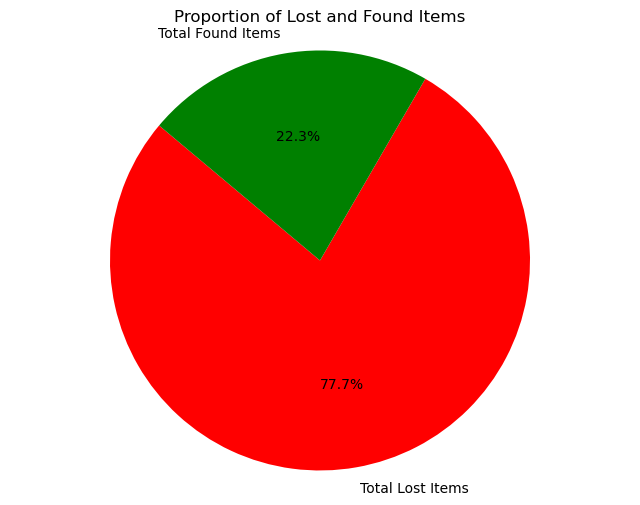

In [27]:
# Data for the pie chart
labels = ['Total Lost Items', 'Total Found Items']
sizes = [abs(total_lost_items), total_found_items]  # abs() to ensure positive values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Proportion of Lost and Found Items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Total items lost at each Locations

In [30]:
# Calculate total items lost at each location
lost_items_by_location = data[data['transaction_code'] == 801].groupby('start_location_id')['transaction_quantity'].sum().reset_index()
lost_items_by_location.columns = ['location_id', 'lost_quantity']

print("Lost items by location:")
print(lost_items_by_location)

Lost items by location:
         location_id  lost_quantity
0               AC01            -30
1             AT0201            -80
2          BL010101A             -1
3          BL020301B             -5
4          BL021803B             -1
5          BL021804A             -9
6          BL021804B            -29
7   CC_LOST_LOC_ITEM             14
8               GEEK            -48
9             P0101A            -35
10            P0101B            -47
11             STG01           -200
12             STG02            -10
13            STIN01          -2513
14             STS01           -235
15           STVNA01             -3
16         TR010101A            -30
17         TR010103A           -573
18         TR010103C             -5
19         TR010104A           -400
20         TR010105C             -1
21         TR010107B             -5
22         TR010502C           -139
23         TR030101A            -98
24         TR030101B           -681
25         TR030101C             -3
26  

### Total items found at each location

In [29]:
# Calculate total items found at each location
found_items_by_location = data[data['transaction_code'] == 802].groupby('start_location_id')['transaction_quantity'].sum().reset_index()
found_items_by_location.columns = ['location_id', 'found_quantity']

print("\nFound items by location:")
print(found_items_by_location)


Found items by location:
        location_id  found_quantity
0  CC_LOST_LOC_ITEM            1748


### Monthly Analysis on Lost & Found Inventory Reports 

In [57]:
# Ensure 'end_transaction_date' is datetime type and handle errors/missing values
data['end_transaction_date'] = pd.to_datetime(data['end_transaction_date'], errors='coerce')

# Extract the month and year from 'end_transaction_date' for grouping
data['transaction_month'] = data['end_transaction_date'].dt.to_period('M')

# Drop rows where 'end_transaction_date' could not be converted to datetime
data = data.dropna(subset=['end_transaction_date'])

# Calculate lost quantities per month
lost_quantities = data[data['transaction_code'] == 801].groupby('transaction_month')['transaction_quantity'].sum()
lost_quantities.name = 'Lost Quantity'

# Calculate found quantities per month
found_quantities = data[data['transaction_code'] == 802].groupby('transaction_month')['transaction_quantity'].sum()
found_quantities.name = 'Found Quantity'

# Combine the lost and found quantities into one DataFrame
monthly_trends = pd.concat([lost_quantities, found_quantities], axis=1).fillna(0)

print(monthly_trends)

                   Lost Quantity  Found Quantity
transaction_month                               
2023-01                      -30            70.0
2023-02                     -221             0.0
2023-03                      -16             0.0
2023-04                     -110             0.0
2023-05                       -8             0.0
2023-06                     -181             0.0
2023-07                      -14             0.0
2023-08                       -2             0.0
2023-09                      -83             5.0
2023-10                      -11             0.0
2023-11                       -9             0.0
2023-12                     -150             0.0
2024-01                     -113             0.0
2024-02                      -29             0.0
2024-04                     -194             0.0
2024-05                     -575             5.0
2024-06                       -4             1.0
2024-07                     -162             0.0
2024-08             